<a href="https://colab.research.google.com/github/leenago/Asiae_edu/blob/master/Industrial_Bigdata/200918_%EB%84%A4%EC%9D%B4%EB%B2%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%9E%A9_%EA%B2%80%EC%83%89%EC%96%B4%ED%8A%B8%EB%A0%8C%EB%93%9C_(3)%EA%B2%80%EC%83%89%EC%96%B4_%ED%8A%B8%EB%A0%8C%EB%93%9C%2B%EC%A3%BC%EA%B0%80%EB%B6%84%EC%84%9D%2B%ED%86%B5%EA%B3%84%EB%9F%89%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 데이터랩에서 검색어 트렌드 분석하기
- 검색어 트렌드 분석을 하여, 검색어 증가에 따른 주가 영향을 분석해본다.
- 마케팅 효과와 검색어 증가량을 분석해볼 수 있다.
- 마케팅 효과의 지속기간을 파악하여, 마케팅 수명관리를 해볼 수 있다.
- 경쟁사의 마케팅 파급효과 분석을 해볼 수 있다.

  +) 여기에 추가적으로 NLP를 추가한다면, 더 정확한 트렌드 분석을 할 수 있다.

- [reference](https://developers.naver.com/docs/datalab/search/#python) 
  - 'Naver Developer' 가입
  - 'Application 등록'을 해주어야 한다.

##1.사전작업
- 필요 패키지 설치하기

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()


##2.작업하기

## 1)Naver Developer에서 제공하는 '**통합 검색어 트렌드 API**' 가져오기

In [2]:
nid = 
nkey = 

In [3]:
#reference에서 제공해주는 코드 가져오기

import json
import os
import sys
import urllib.request

client_id = nid
client_secret = nkey 
url = "https://openapi.naver.com/v1/datalab/search";
#body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}"
body="""{
    "startDate":"2019-01-01",
    "endDate":"2020-08-30",
    "timeUnit":"month",
    "keywordGroups":[
          {"groupName":"비비고","keywords":["비비고만두"]},
          {"groupName":"고메","keywords":["고메피자","고메치킨"]}
    ]
    }"""            #주석처리 된, 원래의 body를 보기 좋게 만들어주었다.
                    #reference 페이지에 가보면, 더 많은 parameter들이 존재한다.
                    
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if (rescode==200):
    response_body = response.read()
    res=response_body.decode('utf-8')
    print(res)
else:
    print("Error Code:" + rescode)

{"startDate":"2019-01-01","endDate":"2020-08-31","timeUnit":"month","results":[{"title":"비비고","keywords":["비비고만두"],"data":[{"period":"2019-01-01","ratio":89.26907},{"period":"2019-02-01","ratio":46.36021},{"period":"2019-03-01","ratio":48.12611},{"period":"2019-04-01","ratio":43.85745},{"period":"2019-05-01","ratio":43.35987},{"period":"2019-06-01","ratio":38.5174},{"period":"2019-07-01","ratio":43.44668},{"period":"2019-08-01","ratio":35.79444},{"period":"2019-09-01","ratio":34.06242},{"period":"2019-10-01","ratio":44.13695},{"period":"2019-11-01","ratio":48.74227},{"period":"2019-12-01","ratio":53.60167},{"period":"2020-01-01","ratio":69.06284},{"period":"2020-02-01","ratio":92.55102},{"period":"2020-03-01","ratio":100},{"period":"2020-04-01","ratio":65.39341},{"period":"2020-05-01","ratio":45.10459},{"period":"2020-06-01","ratio":45.45396},{"period":"2020-07-01","ratio":53.47886},{"period":"2020-08-01","ratio":64.10603}]},{"title":"고메","keywords":["고메피자","고메치킨"],"data":[{"period":"2

- JSON 형식 속성
  - startDate: 조회 기간 시작 날짜(`yyyy-mm-dd` 형식)
  - endDate: 조회 기간 종료 날짜(`yyyy-mm-dd` 형식)
  - timeUnit: 구간 단위
  - results.title: 주제어
  - results.keywords: 주제어에 해당하는 검색어
  - result.data.period: 구간별 시작 날짜(`yyyy-mm-dd` 형식)
  - results.data.ratio: **구간별 검색량**의 **상대적 비율**. 구간별 결과에서 **가장 큰 값**을 **100**으로 설정한 상댓값입니다.

- [파라메터 설정값](https://developers.naver.com/docs/datalab/search/#python) 은 여기서 참고


## 2)'통합 검색어 트렌드 API' 수정 작업

### (1) JSON 데이터 분해해서 알아보기

2


       period     ratio
0  2019-01-01  89.26907
1  2019-02-01  46.36021
2  2019-03-01  48.12611
3  2019-04-01  43.85745
4  2019-05-01  43.35987




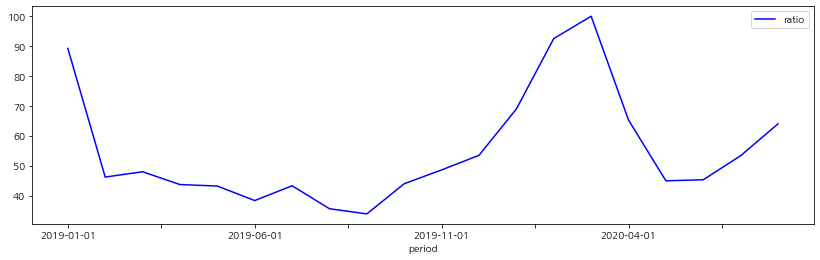

In [4]:
#json을 jdata로 분해해서 알아본 것 

jdata = json.loads(res)       #위에서 정의한 res를 쪼개보는 작업
#print(jdata)                 #jdata에는 'startDate','endDate','timeUnit','results'라는 key가 있고, 
#print(jdata['results'])      #'results'에는 [] 안에 {제일제당}, {오뚜기} 가 있음
print(len(jdata['results']))  #그래서 len이 2개인 것!
#rint(jdata['results'][1])    #0: 제일제당, 1:오뚜기
print('\n')

pdata = jdata['results'][0]['data']
cjdf = pd.DataFrame.from_dict(pdata)
print(cjdf.head())
print('\n')

#period와 ratio를 시각화
plt.rcParams["figure.figsize"] = (14,4) 
cjdf.plot(kind='line', x='period', y='ratio', color='Blue')
plt.legend()
plt.show()

### (2)'makeQry'함수 만들기
- body 파트를 임의의 res 형태로 만들어주는 작업

In [5]:
# makeQry: 네이버에 내가 무엇을 물을 것인가

def makeQry(keywords=[], sdate='', edate='', tunit=''):
  res=[]
  for words in keywords:
    dict= {'groupName':words[0],'keywords':words}
    res.append(dict)
    #print(words[0])    #keywords가 리스트 안에 리스트형태이기 때문에, [0]을 하면 모든 영화제목이 나온다.

  rdict= {"startDate":sdate,
    "endDate":edate,
    "timeUnit":tunit,
    "keywordGroups":res}
  return json.dumps(rdict, ensure_ascii=False)


keywords=[
['비비고','비비고죽','비비고밥','비비고김치','비비고만두'],
['고메','고메치킨','고메피자','고메함박스테이크'],
['햇반','햇반컵반','햇반잡곡밥']  #이젠 여러 개 들어가는군!
]


makeQry(keywords, '2019-01-01', '2020-08-30','date')

'{"startDate": "2019-01-01", "endDate": "2020-08-30", "timeUnit": "date", "keywordGroups": [{"groupName": "비비고", "keywords": ["비비고", "비비고죽", "비비고밥", "비비고김치", "비비고만두"]}, {"groupName": "고메", "keywords": ["고메", "고메치킨", "고메피자", "고메함박스테이크"]}, {"groupName": "햇반", "keywords": ["햇반", "햇반컵반", "햇반잡곡밥"]}]}'

### (3) 'MyNsearch'함수 만들기
- 데이터랩에서 받아온 API 코드에, makeQry 함수를 body값으로 받게 만들어주는 작업
- 검색량을 출력한다

In [6]:
def MyNsearch(keywords=[],sday='',eday='',tunit=''):    
    client_id = nid ##########################
    client_secret = nkey ###########################
    url = "https://openapi.naver.com/v1/datalab/search";
    
    body=makeQry(keywords,sday,eday,tunit) #######
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res=response_body.decode('utf-8')
    else:
        res = 'error'
        print("Error Code:" + rescode)
    return res

### (4) MyDataLab 함수를 만들기
- 키워드 검색량 데이터를 DataFrame 형태로 만들어주는 함수

In [7]:
#MyDataLab으로 
def MyDataLab(keywords=[], sdate ="", edate="", tunit=''):
  #네이버 데이터랩 서치
  res = MyNsearch(keywords, sdate, edate, tunit)

  #데이터 추출을 위한 json
  jdata = json.loads(res)

  i=0;
  #테이블 머지를 위한 기초테이블 만들기
  maindf = pd.DataFrame()

  #키워드별로 컬럼명 지정
  for words in keywords:
    pdata = jdata['results'][i]['data']     #기초 i가 0이라, jdata에서 'result'에 들어가서 일단 [0]번 컬럼에 들어간다. 그 다음, 'title','keywords','data' 중에서 'data'에 해당하는 값들을 가져온다. 
    df = pd.DataFrame.from_dict(pdata)
    df.columns=['period', words[0].strip()] #strip(): 문자열 양쪽 끝에 있는 공백 제거
    df1= df.set_index('period')
    maindf = pd.merge(maindf, df1, how='outer', left_index= True, right_index = True)
    i+=1                                    #두번째 title이 들어가게 된다.

  return maindf


### (5) 사용했던 함수들로 검색어 트렌드 분석하기

In [8]:
keywords=[
['비비고','비비고죽','비비고밥','비비고김치','비비고만두'],
['고메','고메치킨','고메피자','고메함박스테이크'],
['햇반','햇반컵반','햇반잡곡밥']  #이젠 여러 개 들어가는군!
]

mdf = MyDataLab(keywords, "2020-01-01", "2020-08-30", 'date') 
mdf.tail()

,비비고,고메,햇반
period,,,
2020-08-26,40.02922,17.47708,31.96492
2020-08-27,43.64952,12.23595,31.33386
2020-08-28,40.30158,15.73668,29.86581
2020-08-29,37.59798,10.96054,28.78969
2020-08-30,50.87684,11.40560,33.07426


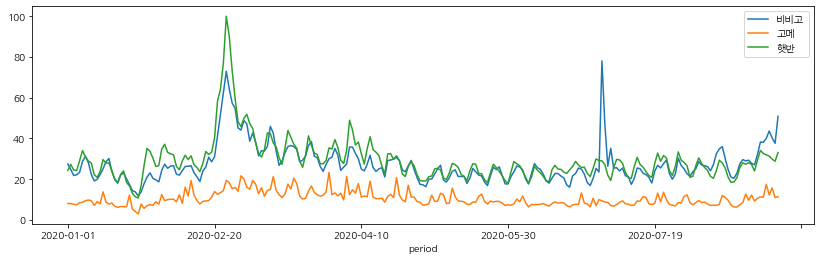

In [9]:
mdf.plot()
plt.show()

- CJ제일제당의 제품군들이 주로 검색어 트렌드에 많이 등장한다고 볼 수 있다.
- 에어프라이어기의 유행으로 고메라인이 많이 검색되었을 줄 알았는데, 비비고 라인과 햇반 라인에 비해 검색량이 적다는 것을 알 수 있다.
 - 각 라인이 언제 출시 되었을까?
- 영화의 경우, 개봉일 전후로 검색어 트렌드를 보면 되지만, 식품의 경우는?

##3) CJ제일제당 주가 분석

###(1)CJ제일제당 주가데이터 가져오기
- BigQuery와 연동을 해서 주가 데이터를 가지고 온다.
- 참고로 19년 12월 31일, 20년 1월 1일엔 주식시장이 개장하지 않았다.

In [10]:
import pandas as pd
from pandas.io import gbq

project_id = 'stockcj'
sql = """
SELECT DATE, OPENP, CLOSEP, HIGHP, LOWP, VOL
FROM `NaverStock.CJ_cj`
WHERE DATE>=20200101 and DATE<=202000830
ORDER BY DATE asc
"""

CJ_cj= pd.read_gbq(sql, project_id = project_id, dialect='standard')
CJ_cj.head()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=lNH8nQ8aGSxdSoboIcoj4MPTEi97jJ&prompt=consent&access_type=offline
Enter the authorization code: 4/4QG8VEGnJNBHXPajqNn4I0wjwuHsu6vvWEWGrHQKt_F3Ngta-a7vfW4


,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL
0,20200102,252500.0,245000.0,253000.0,245000.0,32615.0
1,20200103,245500.0,241000.0,248000.0,240500.0,40183.0
2,20200106,239500.0,233500.0,240500.0,232000.0,39960.0
3,20200107,236000.0,234000.0,236500.0,232500.0,29816.0
4,20200108,230000.0,229500.0,232500.0,227500.0,36835.0


### (2) CJ제일제당의 주식과 검색량의 관계 알아보기
- 2020.01.01~2020.08.30의 주가 데이터와 네이버 검색어 트렌드 데이터의 검색량을 가져온다.

In [11]:
#index를 mdf의 'period'와 맞춰주는 작업
CJ_cj['period'] = [str(p)[:4]+'-'+str(p)[4:-2]+'-'+str(p)[-2:] for p in CJ_cj['DATE']]
CJ_stockinfo = CJ_cj.set_index('period')
CJ_stockinfo.head()

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL
period,,,,,,
2020-01-02,20200102,252500.0,245000.0,253000.0,245000.0,32615.0
2020-01-03,20200103,245500.0,241000.0,248000.0,240500.0,40183.0
2020-01-06,20200106,239500.0,233500.0,240500.0,232000.0,39960.0
2020-01-07,20200107,236000.0,234000.0,236500.0,232500.0,29816.0
2020-01-08,20200108,230000.0,229500.0,232500.0,227500.0,36835.0


In [29]:
keywords=[
['비비고','비비고죽','비비고밥','비비고김치','비비고만두'],
['고메','고메치킨','고메피자','고메함박스테이크'],
['햇반','햇반컵반','햇반잡곡밥']  #이젠 여러 개 들어가는군!
]

mdf = MyDataLab(keywords, "2020-01-01", "2020-08-30", 'date') 
mdf.head()

,비비고,고메,햇반
period,,,
2020-01-01,27.44785,8.05101,24.36561
2020-01-02,24.77746,8.01780,27.26850
2020-01-03,21.79487,7.66573,24.49182
2020-01-04,22.14693,7.40666,24.23276
2020-01-05,23.31606,8.39643,29.01554


In [30]:
alldf = pd.merge(CJ_stockinfo, mdf, how="outer", left_index=True, right_index=True)
alldf = alldf.interpolate() #선형보간법: 두점의 값이 주어졌을 때, 그 사이에 위치한 값을 추정하기 이해 직선거리에 따라 선형적으로 계산하는 방법
alldf.head()

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL,비비고,고메,햇반
period,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.44785,8.05101,24.36561
2020-01-02,20200102.0,252500.0,245000.0,253000.0,245000.000000,32615.000000,24.77746,8.01780,27.26850
2020-01-03,20200103.0,245500.0,241000.0,248000.0,240500.000000,40183.000000,21.79487,7.66573,24.49182
2020-01-04,20200104.0,243500.0,238500.0,245500.0,237666.666667,40108.666667,22.14693,7.40666,24.23276
2020-01-05,20200105.0,241500.0,236000.0,243000.0,234833.333333,40034.333333,23.31606,8.39643,29.01554


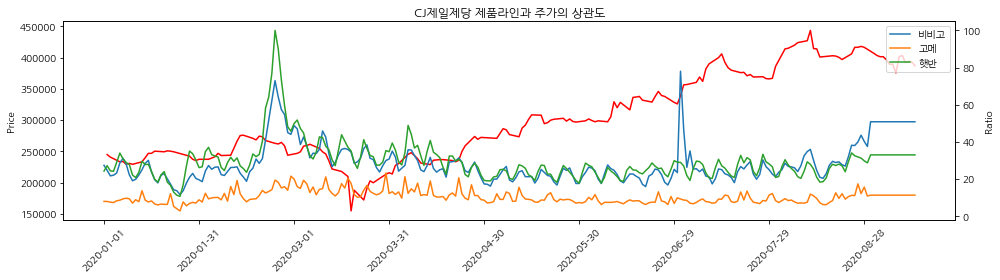

In [31]:
import numpy as np

setdf = alldf[['비비고','고메','햇반']] #alldf에는 메인 키워드만 존재!

xtic = np.arange(0, len(alldf.index), step=30) #0부터 alldf의 index 수만큼, 30 차이로 표시(보통 한 달이 30일이니까)
#np.arange: Return evenly spaced values within a given interval.
xdays = [alldf.index[i] for i in xtic]

plt.rcParams['figure.figsize'] = (14,4)
fig, ax1 = plt.subplots() 
plt.xticks(xtic, rotation=45) #x축의 값 설정하기

ax1.plot(alldf['CLOSEP'], color='red')
ax1.set_ylabel('Price')

ax2 = ax1.twinx()
ax2.set_ylabel('Ratio')
setdf.plot(ax=ax2)
plt.title('CJ제일제당 제품라인과 주가의 상관도')
fig.tight_layout()

plt.show()

###(3) MyDBLab 함수 정의
- 원하는 회사의 주식데이터와 검색량 데이터를 함께 보여주는 함수

In [32]:
#위에서 한 작업들을 일반화해주는 함수 만들기
def MyDBLab(keywords=[],sdate='', edate='', tunit='',sname=''):  #sname에 BigQuery에서 만든 테이블 이름이 들어가야 함.

  #네이버 DataLab 검색량 데이터 추출
  mdf = MyDataLab(keywords, sdate, edate, tunit)

  #쿼리문에 대입하기 위한 문자열 수정
  sdatecode = sdate.replace('-','')
  edatecode = edate.replace('-','')

  #SQL문 생성하기
  whsrc = 'SELECT DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL FROM `NaverStock.{}` WHERE DATE >= {} and DATE<= {} ORDER BY DATE asc'
  sql = whsrc.format(sname, sdatecode, edatecode)

  #BigQuery에서 주가데이터 가져와서 정제
  df = pd.read_gbq(sql, project_id = project_id, dialect='standard')
  df['period'] = [str(p)[:4]+'-'+str(p)[4:-2]+'-'+str(p)[-2:] for p in df['DATE']]
  dfstock = df.set_index('period')

  #주식데이터와 네이버 DataLab 검색량 데이터 merge
  alldf = pd.merge(dfstock, mdf, how='outer', left_index=True, right_index=True)

  #선형보간
  alldf = alldf.interpolate()

  return alldf


In [64]:
keywords=[
['비비고','비비고죽','비비고밥','비비고김치','비비고만두'],
['고메','고메치킨','고메피자','고메함박스테이크'],
['햇반','햇반컵반','햇반잡곡밥']
]

alldf = MyDBLab(keywords, '2019-01-01', '2020-08-30', 'date','CJ_cj')
alldf.head()

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL,비비고,고메,햇반
period,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,19.45780,9.42010,24.04758
2019-01-02,20190102.0,330500.000000,331000.0,334500.0,326500.000000,36351.0,22.46781,10.23924,31.36783
2019-01-03,20190103.0,331500.000000,328000.0,331500.0,326000.000000,22538.0,22.77337,13.59381,31.05577
2019-01-04,20190104.0,329500.000000,342000.0,345000.0,326500.000000,51429.0,19.87387,10.77233,26.36848
2019-01-05,20190105.0,333666.666667,341500.0,344500.0,330333.333333,41447.0,18.18359,9.25107,22.89689


### (4) PltDBLab 함수 정의
- MyDBLab을 시각화해주는 함수를 정의해본다.

In [65]:
def PltDBLab (alldf, keywords, xstep=10, ptitle=''):

  xtic = np.arange(0, len(alldf.index), step=xstep)
  xdays = [alldf.index[i] for i in xtic]
  
  if (len(keywords)==1):
    setdf = alldf[keywords[0]]     #keywords가 1개라면 if문에서 돌 것이다!
    #print('keywords[0]:', keywords[0])
  else:
    keys=[k[0] for k in keywords]  #지금은 keywords가 ['비비고'],['고메'],['햇반'] 3개라서 else에 걸쳐져있다.
    setdf = alldf[keys]
    #print('keys: ', keys)
    #print('setdf: ', setdf)
    #print(len(keywords))


  #x축을 공유하고 y축을 이중으로 사용
  plt.rcParams['figure.figsize'] = (15,8)
  fig, ax1 = plt.subplots()
  
  #주가 그래프
  ax1.plot(alldf['CLOSEP'], color = 'red')
  ax1.set_ylabel('Price')
  plt.xticks(xtic, rotation = 45)

  #네이버 DataLab 검색량 그래프
  ax2 = ax1.twinx()
  ax2.set_ylabel('Ratio')
  setdf.plot(ax=ax2)

  #그래프 레이아웃 설정
  #pos = axvpos
  #plt.axvline(pos, color='Gold', linestyle='--')
  plt.title(ptitle, fontdict={'fontsize':15})
  plt.legend()
  fig.tight_layout()
  plt.show()

In [66]:
keywords=[
['비비고','비비고죽','비비고밥','비비고김치','비비고만두'],
['고메','고메치킨','고메피자','고메함박스테이크'],
['햇반','햇반컵반','햇반잡곡밥']
]

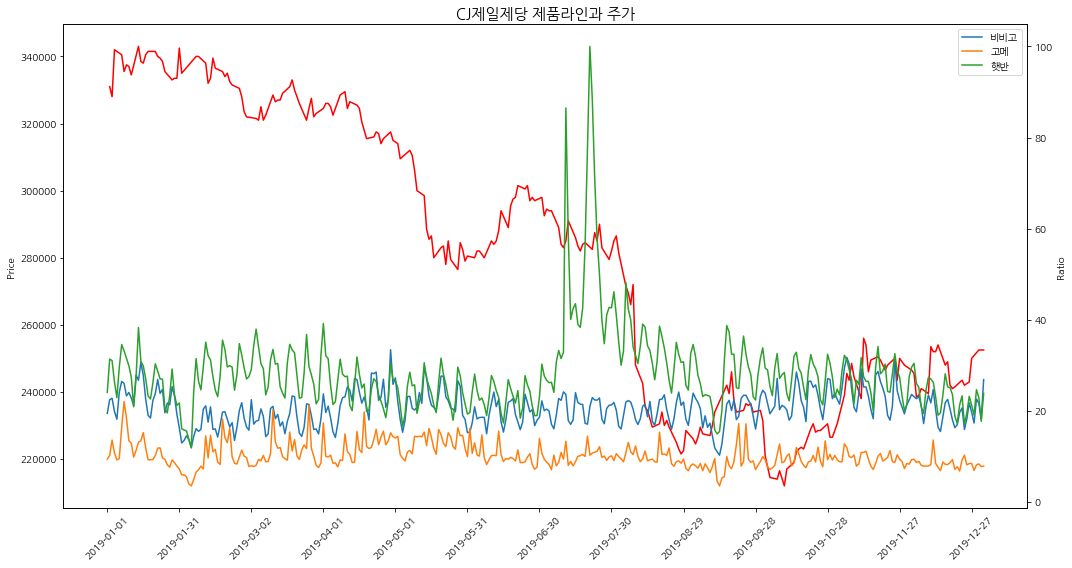

In [67]:
alldf = MyDBLab(keywords, '2019-01-01','2020-01-01','date','CJ_cj')
PltDBLab(alldf, keywords, 30, 'CJ제일제당 제품라인과 주가')


### (5) 해당 라인의 검색량이 주가에 미치는 영향 예시

- 검색량이 가장 많은 비비고 라인을 예시로 들어본다.
- Ratio가 100을 찍고 하락점을 찍은, '2019-05-31'부터 '2019-09-20'를 일단 찍어보려고 한다.

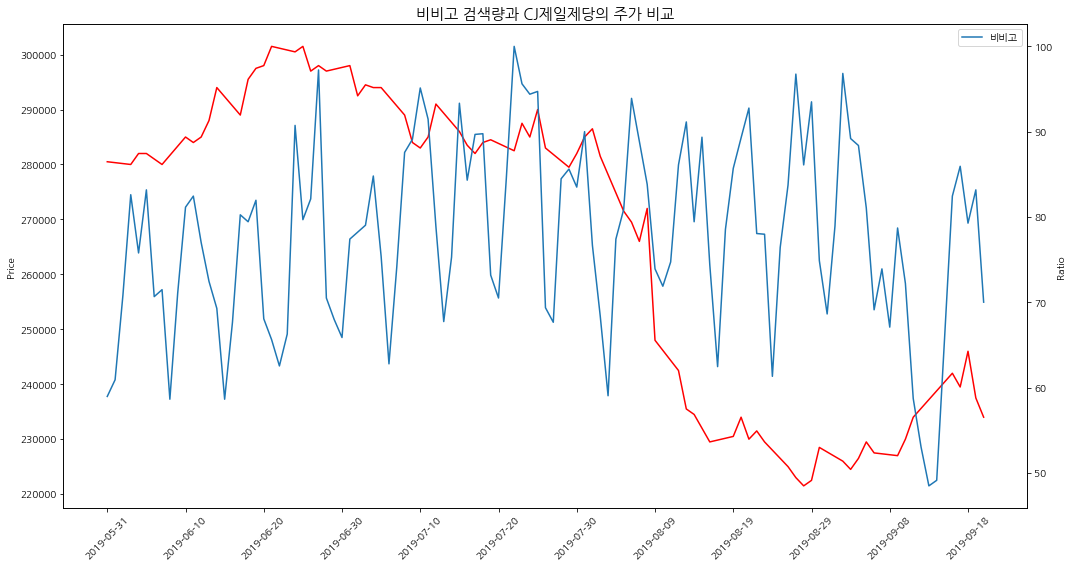

In [69]:
keywords=[['비비고']]
bibigo_df = MyDBLab(keywords, '2019-05-31', '2019-09-20', 'date', 'CJ_cj')
PltDBLab(bibigo_df, keywords, xstep=10, ptitle='비비고 검색량과 CJ제일제당의 주가 비교')

In [86]:
checkdf = bibigo_df[['CLOSEP','비비고']]
checkdf.corr()

,CLOSEP,비비고
CLOSEP,1.00000,-0.01931
비비고,-0.01931,1.00000


- 상관계수가 마이너스가 나왔다.
  - 비비고 라인의 검색량이 주가에는 거의 영향이 없었다고 볼 수 있다.
- 과연 여기서 어떠한 점을 알아낼 수 있을지, 고민을 많이 해보아야 할 것 같다.

### (6) Shift 하기

#### (6)-1 비비고 예시

In [98]:
checkdf.columns = ['CLOSEP','비비고_shift']
checkdf

,CLOSEP,비비고_shift
period,,
2019-05-31,280500.000000,58.97644
2019-06-01,280333.333333,60.92607
2019-06-02,280166.666667,70.83671
2019-06-03,280000.000000,82.61575
2019-06-04,282000.000000,75.79203
...,...,...
2019-09-16,242000.000000,82.45329
2019-09-17,239500.000000,85.94638
2019-09-18,246000.000000,79.28513


In [100]:
shiftdf = checkdf['비비고_shift'].shift(5, fill_value=0) #5일치를 뒤로 밀어서 살펴보는 과정
shiftdf.head(10)

#TypeError: only integer scalar arrays can be converted to a scalar index를 보았다.
#checkdf.columns에 [[]] 형태를 주었더니 이런 오류가 생겼던 것!

period
2019-05-31     0.00000
2019-06-01     0.00000
2019-06-02     0.00000
2019-06-03     0.00000
2019-06-04     0.00000
2019-06-05    58.97644
2019-06-06    60.92607
2019-06-07    70.83671
2019-06-08    82.61575
2019-06-09    75.79203
Name: 비비고_shift, dtype: float64

In [101]:
bibigo_df.head()

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL,비비고
period,,,,,,,
2019-05-31,20190531.0,277000.000000,280500.000000,282000.0,277000.000000,28019.000000,58.97644
2019-06-01,20190555.0,278166.666667,280333.333333,282000.0,277333.333333,26379.666667,60.92607
2019-06-02,20190579.0,279333.333333,280166.666667,282000.0,277666.666667,24740.333333,70.83671
2019-06-03,20190603.0,280500.000000,280000.000000,282000.0,278000.000000,23101.000000,82.61575
2019-06-04,20190604.0,282000.000000,282000.000000,285500.0,279500.000000,20942.000000,75.79203


In [103]:
#본 테이블과 shift한 테이블을 merge하는 작업
shiftall = pd.merge(bibigo_df, shiftdf, how='inner', left_index = True, right_index=True)
shiftall.head(10)

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL,비비고,비비고_shift
period,,,,,,,,
2019-05-31,20190531.0,277000.000000,280500.000000,282000.0,277000.000000,28019.000000,58.97644,0.00000
2019-06-01,20190555.0,278166.666667,280333.333333,282000.0,277333.333333,26379.666667,60.92607,0.00000
2019-06-02,20190579.0,279333.333333,280166.666667,282000.0,277666.666667,24740.333333,70.83671,0.00000
2019-06-03,20190603.0,280500.000000,280000.000000,282000.0,278000.000000,23101.000000,82.61575,0.00000
2019-06-04,20190604.0,282000.000000,282000.000000,285500.0,279500.000000,20942.000000,75.79203,0.00000
2019-06-05,20190605.0,282500.000000,282000.000000,284000.0,280000.000000,17866.000000,83.18440,58.97644
2019-06-06,20190606.0,282000.000000,281000.000000,283250.0,279250.000000,19662.000000,70.67424,60.92607
2019-06-07,20190607.0,281500.000000,280000.000000,282500.0,278500.000000,21458.000000,71.48659,70.83671
2019-06-08,20190608.0,281500.000000,281666.666667,283500.0,279000.000000,21896.000000,58.65150,82.61575


In [104]:
check_after5 = shiftall[['CLOSEP','비비고_shift']]
check_after5.corr()

,CLOSEP,비비고_shift
CLOSEP,1.000000,-0.133588
비비고_shift,-0.133588,1.000000


- 5일을 뒤로 밀었을 때보다 상관계수가 더 안좋게 나왔다. 
- 검색어 트렌드와 주가와는 전혀 상관이 없는 것인걸까...


#### (6)-2 일반화해주는 함수 만들기

In [105]:
def shiftGraph (shiftall, baseCol, ptitle='', xstep=10): #axvpos, textpos도 선생님은 변수로 넣어주셨다.

  xtic = np.arange(0, len(shiftall.index), step=10)
  xdays = [shiftall.index[i] for i in xtic]
  shiftdf = shiftall[baseCol + '_shift']
  plt.rcParams['figure.figsize'] = (12,6)
  fig, ax1 = plt.subplots()
  plt.xticks(xtic, xdays, rotation=45)
  ax1.plot(shiftall['CLOSEP'], color = 'red')
  ax1.set_ylabel('Price')
  ax2 = ax1.twinx()
  ax2.set_ylabel('Ratio')
  shiftdf.plot(ax=ax2)
  
  #plt.axvline(axvpos, color='', linestyle='')
  #plt.text(axvpos, textpos, '')


  plt.title(ptitle)
  plt.legend()
  fig.tight_layout()
  plt.show()

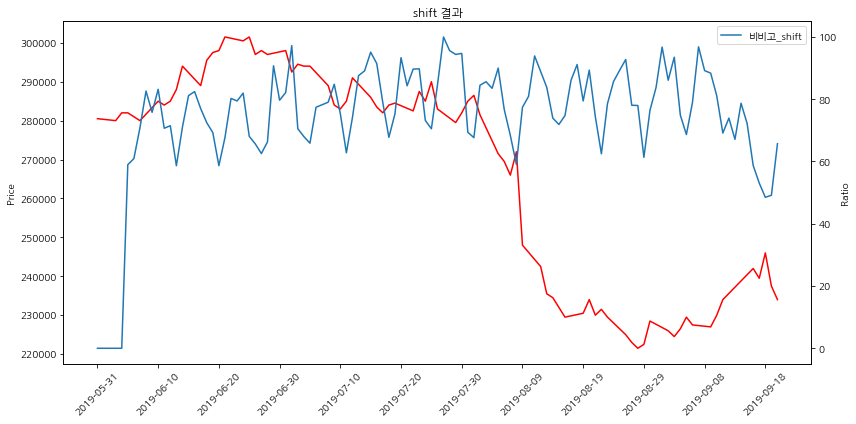

In [107]:
shiftGraph(shiftall, '비비고', 'shift 결과')
#baseCol이라는 변수자리에 '비비고'만 넣으면 알아서 그 값을 찾아주는 것인가..?

### (7) 통계량 분석
- 피어슨 상관계수를 이용해본다
  - 두 변수 X와 Y 간의 선형 상관관계를 계량화한 수치
  - 피어슨 상관계수는 -1과 1 사이의 값을 가진다.
  - 1은 완벽한 양의 선형 상관관계
  - 0은 선형 상관관계 없음
  - -1은 완벽한 음의 선형 상관관계이다.

In [114]:
def shiftLab(alldf, baseCol, shiftday=5):

  #기존 정보상의 상관분석 - 효과가 적음
  checkdf = alldf[['CLOSEP',baseCol]]
  print('-'*40)
  print(checkdf.describe())
  print('-'*40)
  print(checkdf.corr())

  #shift 정보 작성
  checkdf.columns = ['CLOSEP', baseCol+'_shift']
  shiftdf = checkdf[''+baseCol+'_shift'].shift(shiftday, fill_value=0)

  #기존 데이터와 병합 작성
  shiftall=pd.merge(alldf, shiftdf, how='inner', left_index=True, right_index=True)
  check_after5 = shiftall[['CLOSEP',baseCol+'_shift']]

  #새로운 상관분석
  print('-'*40)
  print(check_after5.corr())
  print('-'*40)

  shiftGraph(shiftall, baseCol)

----------------------------------------
              CLOSEP         비비고
count     365.000000  366.000000
mean   281109.589041   20.759232
std     41139.277012    3.781714
min    212000.000000   10.271740
25%    241500.000000   18.081195
50%    283333.333333   20.881545
75%    323500.000000   23.009030
max    343000.000000   33.422180
----------------------------------------
          CLOSEP       비비고
CLOSEP  1.000000 -0.108464
비비고    -0.108464  1.000000
----------------------------------------
             CLOSEP  비비고_shift
CLOSEP     1.000000  -0.171715
비비고_shift -0.171715   1.000000
----------------------------------------


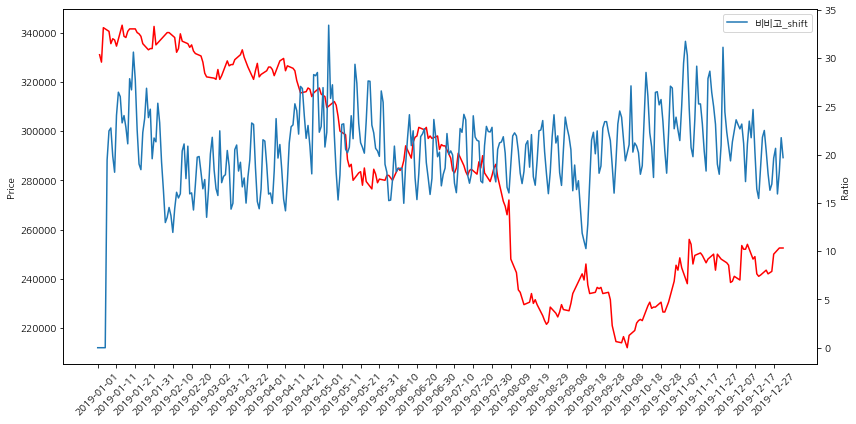

In [115]:
shiftLab(alldf,'비비고', 5)

----------------------------------------
              CLOSEP          고메
count     365.000000  366.000000
mean   281109.589041   10.250106
std     41139.277012    2.763009
min    212000.000000    3.549600
25%    241500.000000    8.485565
50%    283333.333333    9.556620
75%    323500.000000   11.438688
max    343000.000000   22.032240
----------------------------------------
          CLOSEP        고메
CLOSEP  1.000000  0.285545
고메      0.285545  1.000000
----------------------------------------
            CLOSEP  고메_shift
CLOSEP    1.000000  0.094595
고메_shift  0.094595  1.000000
----------------------------------------


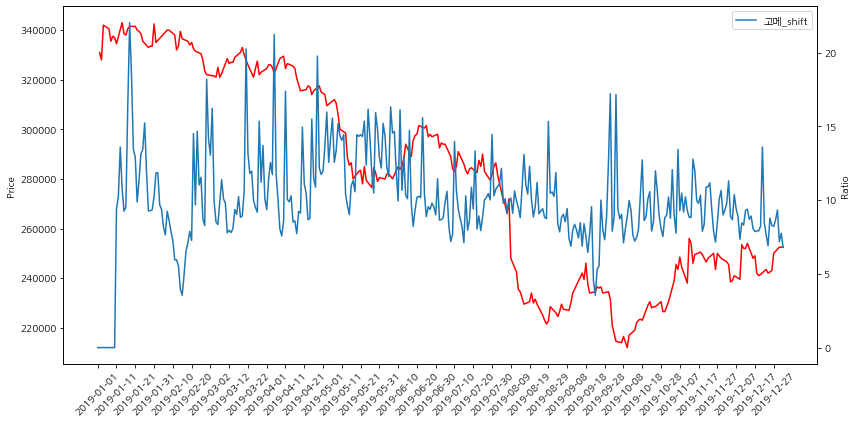

In [116]:
shiftLab(alldf,'고메',10)

----------------------------------------
              CLOSEP          햇반
count     365.000000  366.000000
mean   281109.589041   28.353144
std     41139.277012    9.380802
min    212000.000000   11.877510
25%    241500.000000   23.223567
50%    283333.333333   27.051095
75%    323500.000000   31.156538
max    343000.000000  100.000000
----------------------------------------
          CLOSEP        햇반
CLOSEP  1.000000 -0.013348
햇반     -0.013348  1.000000
----------------------------------------
            CLOSEP  햇반_shift
CLOSEP    1.000000 -0.093738
햇반_shift -0.093738  1.000000
----------------------------------------


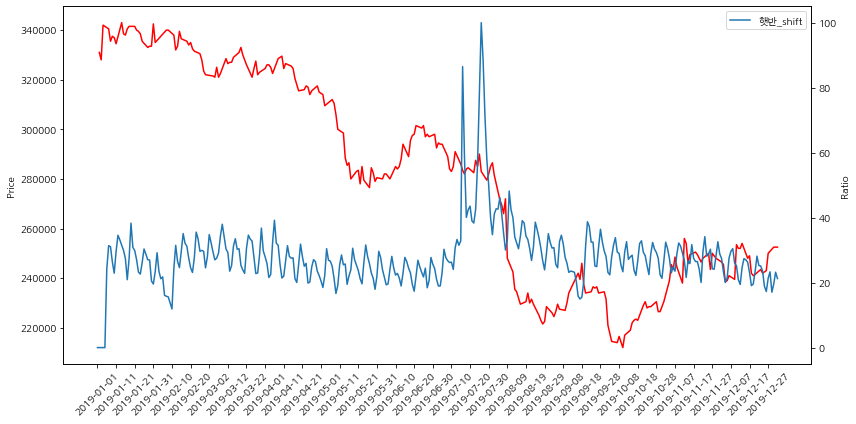

In [117]:
shiftLab(alldf,'햇반')

- 여기서 어떠한 관계를 끌어낼 수 있을는지는... 계속 알아봐야 할 것 같다.
- 지금 당장은 알 수 있는 방법이 없어보인다.